# Setup

In [29]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import glob
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [7]:
plotly.tools.set_credentials_file(username='gasia4444', api_key='rC8FB3pveGzyME366dL7')

# Data

In [17]:
df = pd.read_csv('btc_forum_cleaned_new_pos_neg_sub.csv', parse_dates=(['timestamp'])).set_index('timestamp')

In [18]:
len(df)

503816

In [19]:
df = df.drop_duplicates()

In [26]:
df = df[~df['message_text'].isnull()]

In [27]:
qq = df.resample('5T').agg({'subjectivity': np.nanmean, 'polarity': np.nanmean, 'message_text': ', '.join})

/Users/hrachkhachatryan/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:933: RuntimeWarning:

Mean of empty slice



In [40]:
qq['polarity'] = 0.
qq['subjectivity'] = 0.

In [41]:
for i, row in qq.iterrows():
    blob = TextBlob(str(row.message_text))
    sentiment = blob.sentiment
    qq.set_value(i,'polarity', float(sentiment.polarity))
    qq.set_value(i,'subjectivity', float(sentiment.subjectivity))

/Users/hrachkhachatryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/Users/hrachkhachatryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [44]:
qq.to_csv("pos_neg_grouped.csv")

In [7]:
for index, row in df.iterrows():
    df.set_value(index, 'timestamp', pd.Timestamp(row['timestamp'], unit='s').date())

/home/gasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [8]:
date_topic_groups = df.groupby([df.topic_id, df.timestamp]).groups

In [9]:
df.pos[1]

0.11199999999999999

In [10]:
pos_neg_groups = {}

In [11]:
for titleID, timestamp in date_topic_groups.keys():
    pos = 0.
    neg = 0.
    neu = 0.
    j = len(date_topic_groups[(titleID, timestamp)])
    for item in date_topic_groups[(titleID, timestamp)]:
        pos += df.pos[item]
        neg += df.neg[item]
        neu += df.neu[item]
    pos_neg_groups.update({(titleID, timestamp):{'posts':date_topic_groups[(titleID, timestamp)], 'pos': pos/j, 'neg': neg/j, 'neu':neu/j}})

In [12]:
pos_neg_groups

{(27683, Timestamp('2011-07-10 00:00:00')): {'neg': 0.0,
  'neu': 0.889,
  'pos': 0.111,
  'posts': Int64Index([19060, 19061], dtype='int64')},
 (27683, Timestamp('2011-07-11 00:00:00')): {'neg': 0.0,
  'neu': 0.7829999999999999,
  'pos': 0.217,
  'posts': Int64Index([19062], dtype='int64')},
 (27683, Timestamp('2011-07-12 00:00:00')): {'neg': 0.0665,
  'neu': 0.882,
  'pos': 0.051500000000000004,
  'posts': Int64Index([19063, 19064], dtype='int64')},
 (27683, Timestamp('2011-07-13 00:00:00')): {'neg': 0.025666666666666667,
  'neu': 0.7000000000000001,
  'pos': 0.2743333333333333,
  'posts': Int64Index([19065, 19066, 19067], dtype='int64')},
 (27683, Timestamp('2011-07-18 00:00:00')): {'neg': 0.121,
  'neu': 0.6485000000000001,
  'pos': 0.2305,
  'posts': Int64Index([19068, 19069], dtype='int64')},
 (27683, Timestamp('2014-03-15 00:00:00')): {'neg': 0.038799999999999994,
  'neu': 0.8382,
  'pos': 0.123,
  'posts': Int64Index([19070, 19071, 19072, 19073, 19074], dtype='int64')},
 (27683

In [13]:
r=0
for i in pos_neg_groups.keys():
    if pos_neg_groups[i]['pos'] > pos_neg_groups[i]['neg'] :
        r+=1
print(r)

3862


In [14]:
len(pos_neg_groups)

5008

-----------------

In [15]:
grouped_topics = df.groupby(df.topic_id).groups

In [16]:
dict_topic = {}
for tit in tqdm(grouped_topics.keys()):
    sentence = (df.message_text[grouped_topics[tit]].values)
    dict_topic.update({tit: ''.join(str(v) for v in sentence) })

100%|██████████| 1191/1191 [00:00<00:00, 2055.53it/s]


In [17]:
list_message = []
for i in dict_topic.keys():
    list_message.append(dict_topic[i])

In [18]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')  #match any word characters until it reaches a non-word character, like a space.

In [19]:
raw = list_message[0].lower()
tokens = tokenizer.tokenize(raw)  

In [20]:
from stop_words import get_stop_words

# create English stop words list
en_stop = get_stop_words('en')

In [21]:
# remove stop words from tokens
stopped_tokens = [i for i in tokens if not i in en_stop]
# print(stopped_tokens)

In [22]:
remove_words = ['will','s' , 'nbsp', 't', 'com', 'http', 'amp', '1xnk8bc', 'href', 'oto', 'www' ]
stopped_tokens = [i for i in stopped_tokens if not i in remove_words]
# print(stopped_tokens)

In [23]:
from nltk.stem.porter import PorterStemmer

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

# Create lemmatizer
wnl = WordNetLemmatizer()

In [24]:
from collections import Counter

In [25]:
import nltk

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/gasia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
texts = []

remove_words = ['will','s' ,'bitcoin', 'just', 'get', 'use', 'now', 'solidx' 'people','bitfinex', 'think', 'maybe', 'imageshack', 'pt', 'em', 'img', 'nbsp', 't', 'com', 'http', 'amp', '1xnk8bc', 'href', 'oto', 'www', 'isn', 'etc', 'etf', 'tr', 'td', 'img', 'ath', 'xt', 'xp', 'php', 'img', 'gt', 'pboc', 'th', 'mtgox', 'cny', 'huobi',
 'm', 'import', 'st', 'lt', 'zhou' 'ok', 'color', 'can', "adam", "bitcoin", 'import', 'http', 'li', 'b', 'style' , 'font', 're', 'le', 'gif','span','hr', 'd' , 'jpg', 'png',  'am5om', 'fud', 'mt', 'th' 'hfebupaeo', 'ftdata', 'zbb', 'imgur', 'bite', 'uztgwi', 'podomatic']

map_words = {
    'btc': 'bitcoin',
    'bcc': 'bitcoin',
    'gbtc': 'bitcoin',
    'bitcoinca': 'bitcoin',
    'better': 'good',
    'increase': 'rise',
    'miner': 'mine',
    'winner': 'win'
}

bow_dict = {}
for m in dict_topic.keys():
    raw = dict_topic[m].lower()
    tokens = tokenizer.tokenize(raw)
    
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stopped_tokens = [i for i in stopped_tokens if not i in remove_words]

    #   lemmatize tokents:  
    lemmatized_tokens = [wnl.lemmatize(i, 'a') for i in stopped_tokens]
    lemmatized_tokens = [wnl.lemmatize(i, 'n') for i in lemmatized_tokens]
    lemmatized_tokens = [wnl.lemmatize(i, 'v') for i in lemmatized_tokens]
    lemmatized_tokens = [wnl.lemmatize(i, 'r') for i in lemmatized_tokens]
    lemmatized_tokens = [wnl.lemmatize(i, 's') for i in lemmatized_tokens]
    
    #     stemmed_tokens = [p_stemmer.stem(i) for i in lemmatized_tokens]
    
    #   remove words:
    stemmed_tokens = [i for i in lemmatized_tokens if not i in remove_words]
    stemmed_tokens = [i for i in stemmed_tokens if not i in en_stop]
    d = pd.DataFrame({'z': stemmed_tokens})
    stemmed_tokens = d.replace(map_words)['z'].tolist()
    
    #   remove numeric values:
    alpha_only = [''.join(filter(str.isalpha, i))  for i in stemmed_tokens if len(''.join(filter(str.isalpha, i))) >1]
    bow_dict.update({m:alpha_only})
    texts.append(alpha_only)

In [28]:
import gensim

In [29]:
from gensim import corpora, models
import datetime

a = datetime.datetime.now()

dictionary = corpora.Dictionary(texts)

In [30]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [31]:
corpus = []

In [32]:
# keep bag of words in order to get docements for each of the topic
for i in bow_dict.keys():
    bow = dictionary.doc2bow(bow_dict[i])
    corpus.append(bow)
    bow_dict.update({i:bow})

In [33]:
# a = datetime.datetime.now()
# damodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes=20)
# b = datetime.datetime.now()
# c = b - a

In [34]:
from sklearn.externals import joblib
# joblib.dump(damodel, 'LDA_model.pkl') 

In [35]:
damodel = joblib.load('LDA_model.pkl') 

In [36]:
# get LDA topics:
for i in damodel.print_topics(num_topics=50, num_words=10):
    print(i)
    print('-----------------')

(0, '0.028*"inherit" + 0.019*"mine" + 0.015*"price" + 0.015*"top" + 0.014*"valign" + 0.008*"people" + 0.006*"difficulty" + 0.005*"go" + 0.005*"make" + 0.005*"rise"')
-----------------
(1, '0.009*"short" + 0.009*"euro" + 0.007*"buy" + 0.006*"go" + 0.005*"good" + 0.004*"one" + 0.004*"dead" + 0.004*"sell" + 0.004*"greece" + 0.004*"imgflip"')
-----------------
(2, '0.006*"people" + 0.006*"win" + 0.006*"one" + 0.005*"good" + 0.005*"know" + 0.005*"watch" + 0.005*"ico" + 0.004*"entry" + 0.004*"like" + 0.004*"say"')
-----------------
(3, '0.009*"dec" + 0.008*"em" + 0.008*"pt" + 0.008*"sum" + 0.008*"bid" + 0.007*"height" + 0.007*"nov" + 0.007*"twimg" + 0.007*"pb" + 0.006*"medium"')
-----------------
(4, '0.005*"train" + 0.004*"node" + 0.004*"protrade" + 0.004*"thread" + 0.004*"topic" + 0.003*"speed" + 0.003*"profile" + 0.003*"ote" + 0.003*"bullbearanalytics" + 0.002*"org"')
-----------------
(5, '0.007*"like" + 0.006*"time" + 0.006*"see" + 0.005*"market" + 0.005*"say" + 0.004*"make" + 0.004*"ch

In [37]:
final_date_topic_dict = {}

In [38]:
pos_neg_groups

{(27683, Timestamp('2011-07-10 00:00:00')): {'neg': 0.0,
  'neu': 0.889,
  'pos': 0.111,
  'posts': Int64Index([19060, 19061], dtype='int64')},
 (27683, Timestamp('2011-07-11 00:00:00')): {'neg': 0.0,
  'neu': 0.7829999999999999,
  'pos': 0.217,
  'posts': Int64Index([19062], dtype='int64')},
 (27683, Timestamp('2011-07-12 00:00:00')): {'neg': 0.0665,
  'neu': 0.882,
  'pos': 0.051500000000000004,
  'posts': Int64Index([19063, 19064], dtype='int64')},
 (27683, Timestamp('2011-07-13 00:00:00')): {'neg': 0.025666666666666667,
  'neu': 0.7000000000000001,
  'pos': 0.2743333333333333,
  'posts': Int64Index([19065, 19066, 19067], dtype='int64')},
 (27683, Timestamp('2011-07-18 00:00:00')): {'neg': 0.121,
  'neu': 0.6485000000000001,
  'pos': 0.2305,
  'posts': Int64Index([19068, 19069], dtype='int64')},
 (27683, Timestamp('2014-03-15 00:00:00')): {'neg': 0.038799999999999994,
  'neu': 0.8382,
  'pos': 0.123,
  'posts': Int64Index([19070, 19071, 19072, 19073, 19074], dtype='int64')},
 (27683

In [39]:
p = 0
n = 0
for titleID, timestamp in pos_neg_groups:
    topics = damodel.get_document_topics(bow_dict[titleID])
    max_prob = 0
    max_t = 0
    for t, prob in topics:
        if prob > max_prob:
            max_prob = prob
            max_t = t
    pos = pos_neg_groups[(titleID, timestamp)]['pos']
    neg = pos_neg_groups[(titleID, timestamp)]['neg']
    neu = pos_neg_groups[(titleID, timestamp)]['neu']
#     print('pos: ', pos, 'neg: ', neg)
    label = 'neu'
    if pos < neg:
        lebel = 'neg'
        final_date_topic_dict.update({(titleID, timestamp):{'maxTopicID': max_t, 'label': 'neg', 'topicProb': max_prob, 'allTopicsWithProb': topics}})
    elif pos > neg:
        label = 'pos'
        final_date_topic_dict.update({(titleID, timestamp):{'maxTopicID': max_t, 'label': 'pos', 'topicProb': max_prob, 'allTopicsWithProb': topics}})
    else:
        final_date_topic_dict.update({(titleID, timestamp):{'maxTopicID': max_t, 'label': 'neu', 'topicProb': max_prob, 'allTopicsWithProb': topics}})

print('pos: ', p)
print('neg: ', n)

pos:  0
neg:  0


In [40]:
c = 0
d = 0
for k,v in final_date_topic_dict.keys():
    if final_date_topic_dict[(k,v)]['label'] == 'pos':
        c+=1
    elif  final_date_topic_dict[(k,v)]['label'] == 'neg':
        d+=1
print(c)
print(d)

3862
931


In [41]:
topic_date_label_dict = {}

In [42]:
for docID, timestamp in final_date_topic_dict:
    max_topic = final_date_topic_dict[(docID, timestamp)]['maxTopicID']
    if (max_topic, timestamp) in topic_date_label_dict:
        topic_date_label_dict[(max_topic, timestamp)].append(final_date_topic_dict[(docID, timestamp)]['label'])
    else:
        topic_date_label_dict[(max_topic, timestamp)] = [final_date_topic_dict[(docID, timestamp)]['label']]

In [43]:
for topicID, timestamp in topic_date_label_dict:
    labels = topic_date_label_dict[(topicID, timestamp)]
    count = len(labels)
    counter = Counter(labels)
    neu = counter['neu']/(0. + count)
    pos = counter['pos']/(0. + count)
    neg = counter['neg']/(0. + count)
    label = 'neu'
    if pos > neg:
        topic_date_label_dict.update({(topicID, timestamp):'pos'})
    elif neg > pos:
        topic_date_label_dict.update({(topicID, timestamp):'neg'})
    else:
        topic_date_label_dict.update({(topicID, timestamp):'neu'})
    

In [44]:
list_id_time =list((topic_date_label_dict.keys()))
id_unique = [list_id_time[i][0] for i in range(len(list_id_time))]
np.unique(id_unique)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

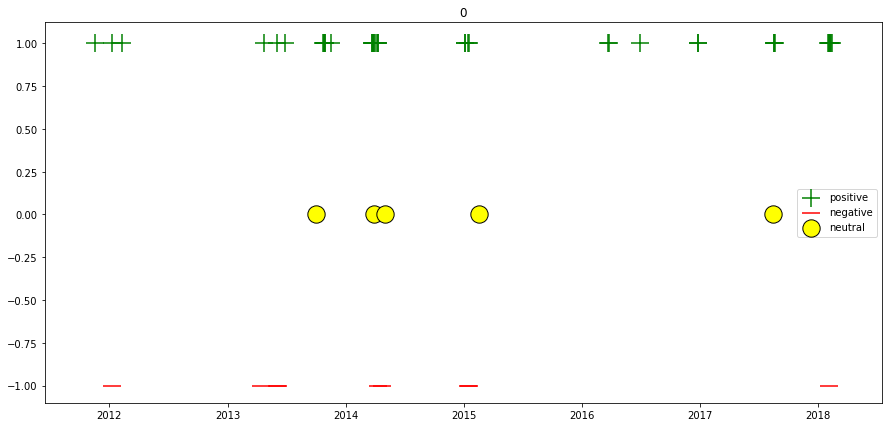

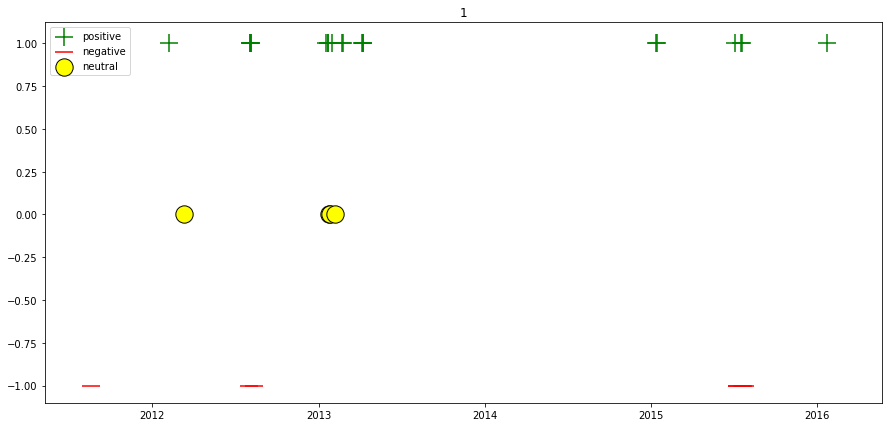

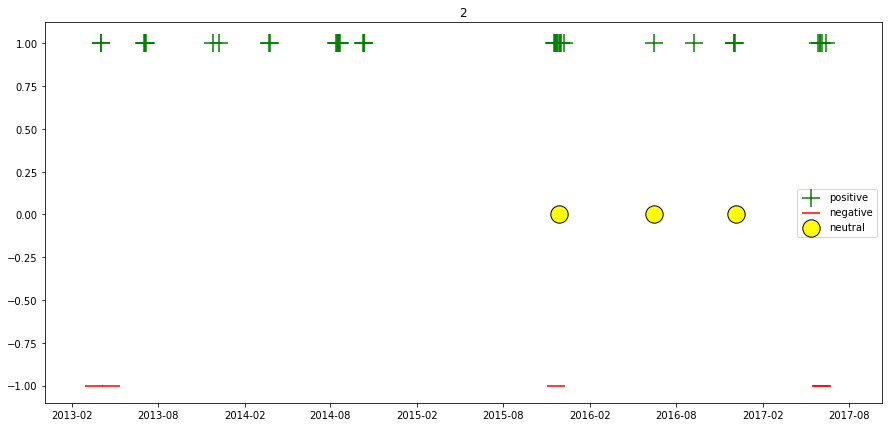

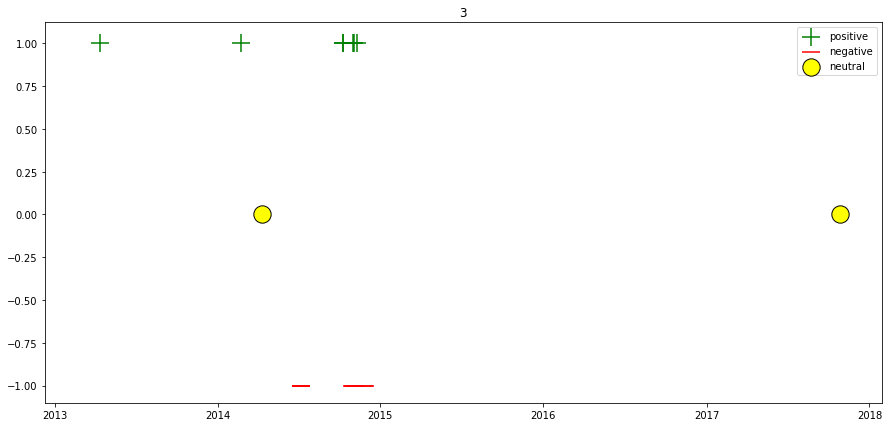

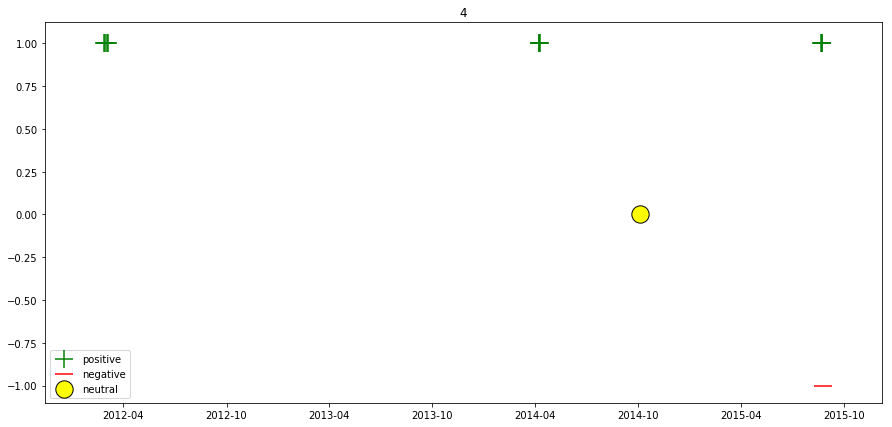

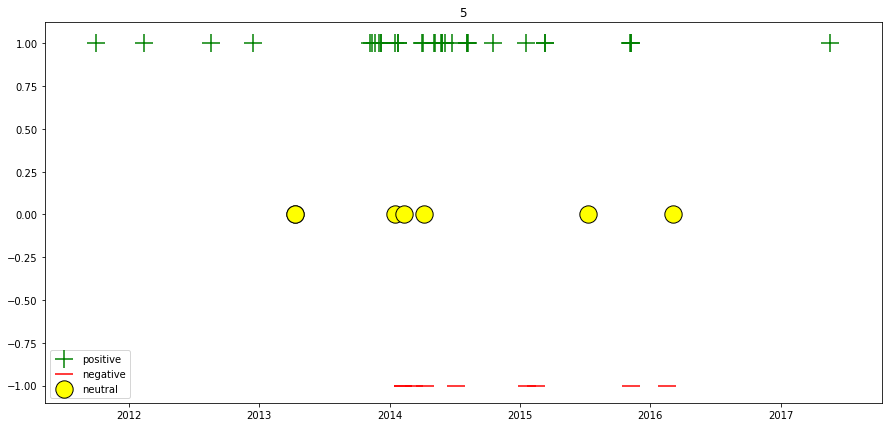

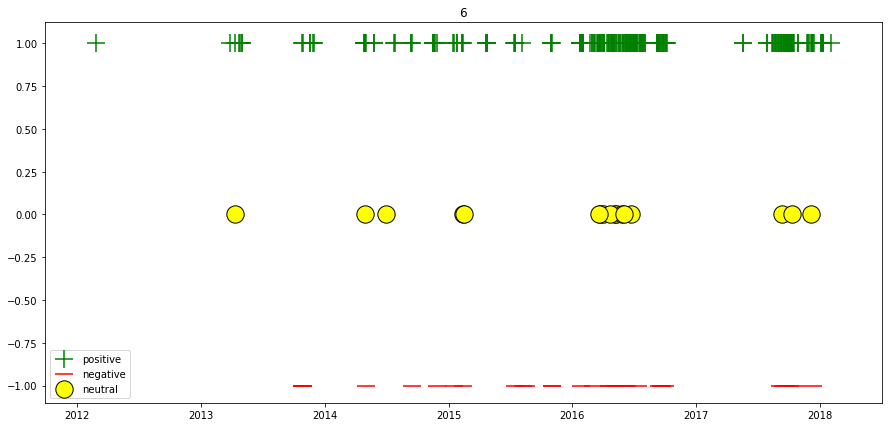

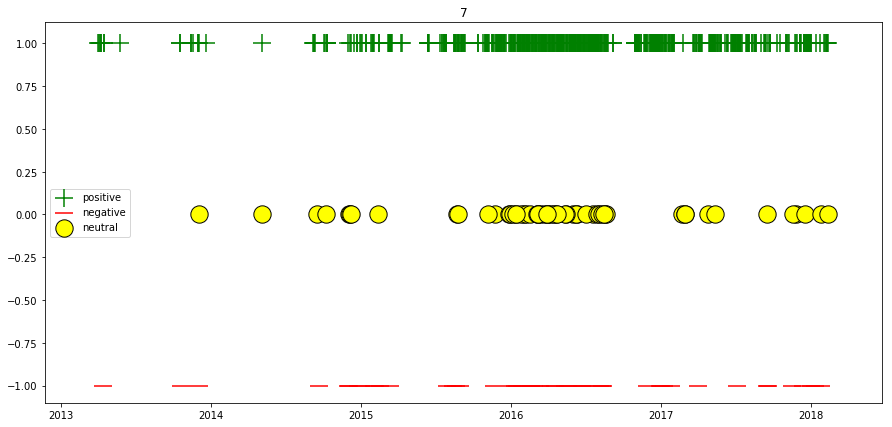

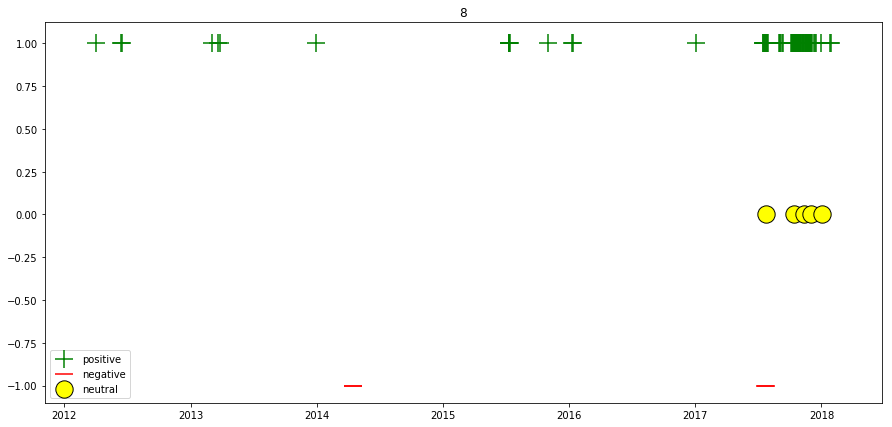

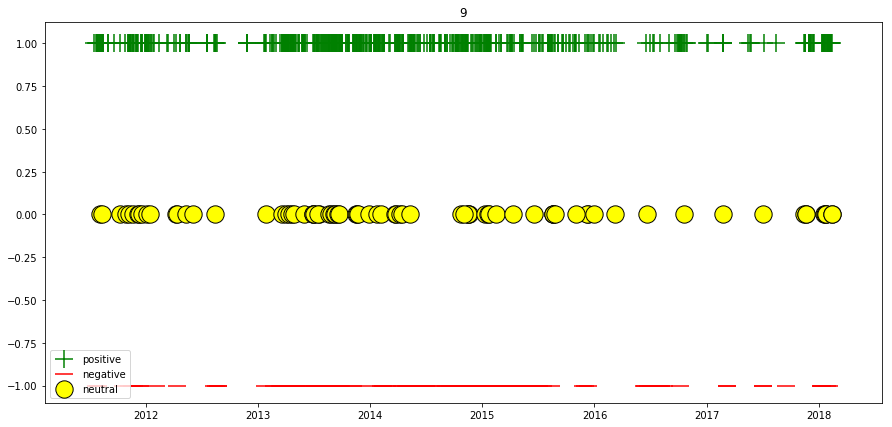

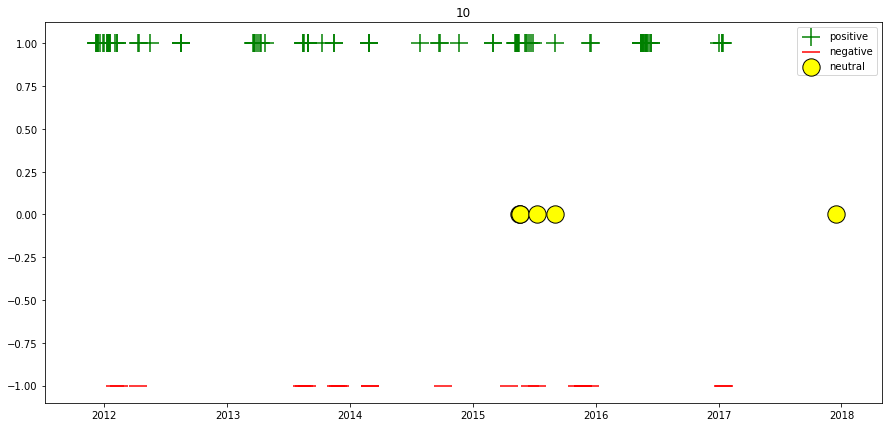

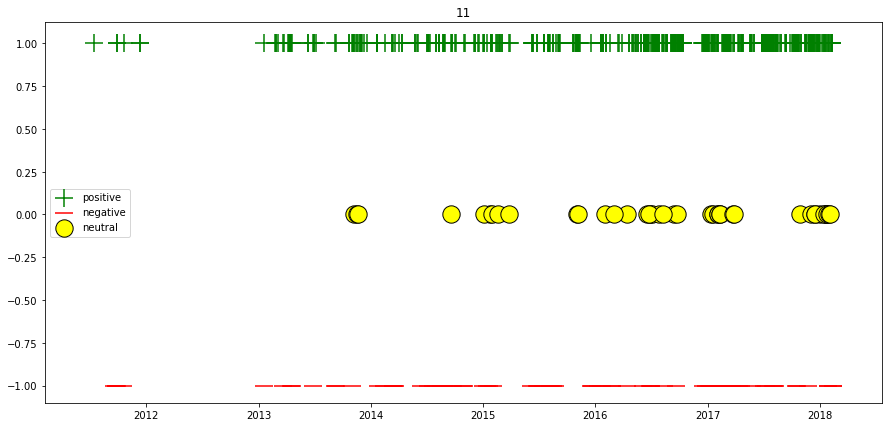

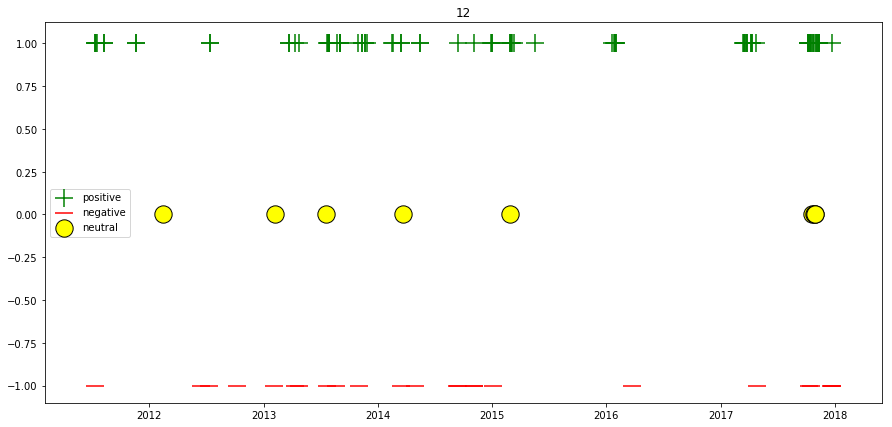

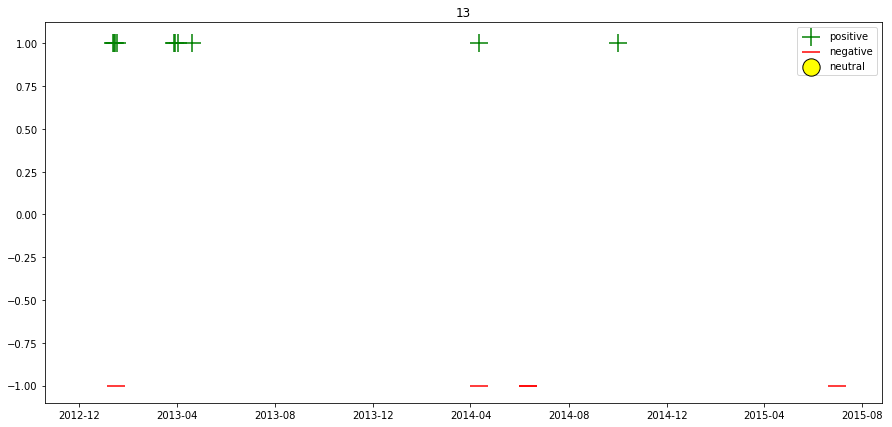

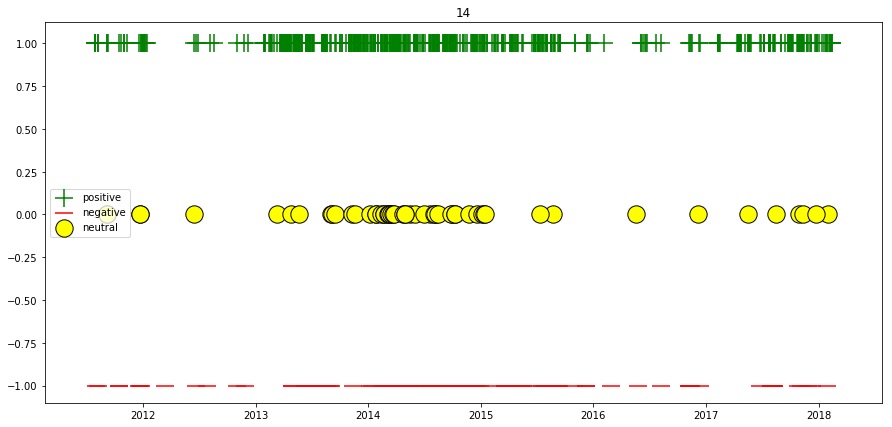

In [45]:
id_unique = np.unique(id_unique)
for id_ in id_unique:
    count = {}
    for key, timestamp in topic_date_label_dict.keys():
        if (key == id_):
            count[timestamp] = topic_date_label_dict[(key, timestamp)]
    
    pos = [key for key, value in count.items() if count[key] == 'pos']
    neg = [key for key, value in count.items() if count[key] == 'neg']
    neu = [key for key, value in count.items() if count[key] == 'neu']

    plt.figure(figsize = (15,7))
    plt.scatter(x = pos,y = np.ones(len(pos)), marker ='+', color='green', edgecolors='black',label ='positive',s=300 )
    plt.scatter(x = neg,y = -1*np.ones(len(neg)), marker ='_', color='red', edgecolors='black', label ='negative', s=300 )
    plt.scatter(x = neu,y = np.zeros(len(neu)), marker ='o', color='yellow', edgecolors='black', label ='neutral', s=300 )
    plt.title(id_)
    plt.legend()
    plt.show()
    #plt.savefig('sample_pos_neg.jpg')


------------------

In [46]:
mapping_val = {'pos':1, 'neg':-1, 'neu':0}
for key in count:
    count[key] = mapping_val[count[key] ]
    

In [47]:
pos = [key for key, value in count.items() if count[key] == 1]
neg = [key for key, value in count.items() if count[key] == -1]
neu = [key for key, value in count.items() if count[key] == 0]

In [48]:
pos_select = [pos[i] for i in range(len(pos)) if pos[i].date().year >= 2017]
neg_select = [neg[i] for i in range(len(neg)) if  neg[i].date().year >= 2017]
neu_select = [neu[i] for i in range(len(neu)) if neu[i].date().year >= 2017]

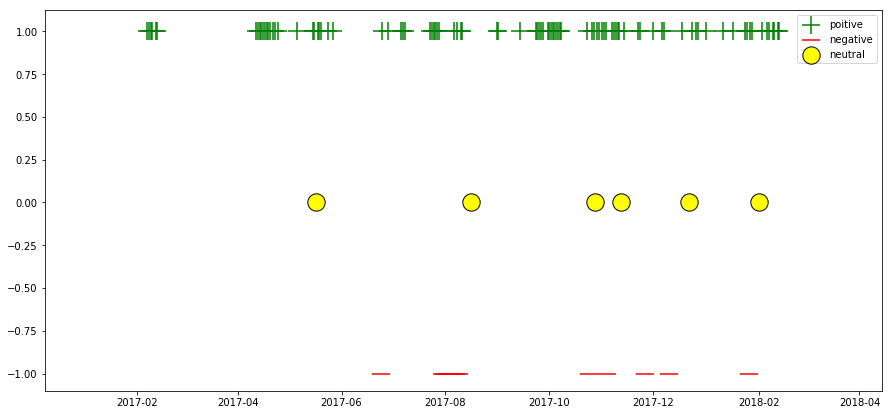

In [49]:
plt.figure(figsize = (15,7))
plt.scatter(x = pos_select,y = np.ones(len(pos_select)), marker ='+', color='green', edgecolors='black',label ='poitive',s=300 )
plt.scatter(x = neg_select,y = -1*np.ones(len(neg_select)), marker ='_', color='red', edgecolors='black', label ='negative', s=300 )
plt.scatter(x = neu_select,y = np.zeros(len(neu_select)), marker ='o', color='yellow', edgecolors='black', label ='neutral', s=300 )
plt.legend()
plt.savefig('sample_pos_neg.jpg')

-----------------------------

In [50]:
df = pd.read_csv('bitcoin_data_1.csv', parse_dates = ['timestamp']).set_index('timestamp')
df.sort_index(inplace=True)
dd = df.drop('time', axis = 1)
df = pd.DataFrame(dd[['low', 'high', 'open', 'close']].mean(axis=1), columns=['data'])
df['volume'] = dd['volume']

In [51]:
from tqdm import tqdm_notebook

In [52]:
data_part = df['2017':]

In [53]:
data_part['pos_neg'] = 0

/home/gasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [121]:
index = data_part.index
qq = [i.replace(hour=0, minute=0, second=0) for i in index]
for nn in tqdm_notebook(range(len(pos_select))):
    indices = [i for i, x in enumerate(qq) if x == pos_select[nn]]
    data_part.iloc[indices, 2] = 1

HBox(children=(IntProgress(value=0, max=95), HTML(value='')))

/home/gasia/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [122]:
for nn in tqdm_notebook(range(len(neg_select))):
    indices = [i for i, x in enumerate(qq) if x == neg_select[nn]]
    data_part.iloc[indices, 2] = -1

HBox(children=(IntProgress(value=0, max=14), HTML(value='')))

/home/gasia/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [123]:
for nn in tqdm_notebook(range(len(neu_select))):
    indices = [i for i, x in enumerate(qq) if x == neu_select[nn]]
    data_part.iloc[indices, 2] = 2

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

/home/gasia/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [125]:
import collections
collections.Counter(data_part.pos_neg.values)

Counter({-1: 3936, 0: 86592, 1: 24536, 2: 1499})

In [128]:

data = [
    go.Scatter(
        x = data_part.index,
        y = data_part.data,
        mode='lines',
        name='ts'),
    
    go.Scatter(
        x = data_part[data_part['pos_neg'] ==1].index,
        y = data_part[data_part['pos_neg'] ==1].data,
        mode='markers',
        name='positive'),
    
    go.Scatter(
        x = data_part[data_part['pos_neg'] ==-1].index,
        y = data_part[data_part['pos_neg'] ==-1].data,
        mode='markers',
        name='negative'),

        ]

py.iplot(data, filename = 'gasia')

/home/gasia/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gasia4444/0 or inside your plot.ly account where it is named 'gasia'


/home/gasia/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [142]:
pos

[]

HBox(children=(IntProgress(value=0, max=95), HTML(value='')))

/home/gasia/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Exception in thread Thread-23:
Traceback (most recent call last):
  File "/home/gasia/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/gasia/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/gasia/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



HBox(children=(IntProgress(value=0, max=14), HTML(value='')))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

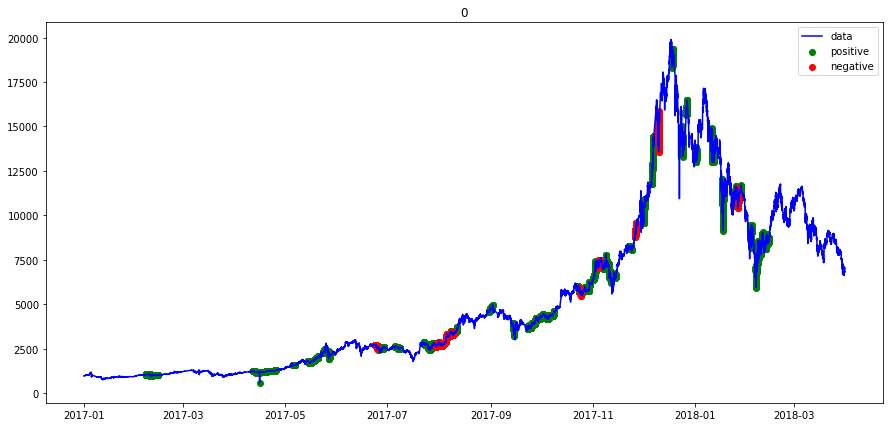

HBox(children=(IntProgress(value=0, max=95), HTML(value='')))

KeyboardInterrupt: 

In [139]:
id_unique = np.unique(id_unique)
for id_ in id_unique:
    count = {}
    for key, timestamp in topic_date_label_dict.keys():
        if (key == id_):
            count[timestamp] = topic_date_label_dict[(key, timestamp)]
            
        pos = [key for key, value in count.items() if count[key] == 'pos']
        neg = [key for key, value in count.items() if count[key] == 'neg']
        neu = [key for key, value in count.items() if count[key] == 'neu']
        
        index = pos
        qq = [i.replace(hour=0, minute=0, second=0) for i in index]
        for nn in tqdm_notebook(range(len(pos_select))):
            indices = [i for i, x in enumerate(qq) if x == pos_select[nn]]
            data_part.iloc[indices, 2] = 1
            
        index = neg
        qq = [i.replace(hour=0, minute=0, second=0) for i in index]
        for nn in tqdm_notebook(range(len(neg_select))):
            indices = [i for i, x in enumerate(qq) if x == neg_select[nn]]
            data_part.iloc[indices, 2] = -1
            
        index = neu
        qq = [i.replace(hour=0, minute=0, second=0) for i in index]
        for nn in tqdm_notebook(range(len(neu_select))):
            indices = [i for i, x in enumerate(qq) if x == neu_select[nn]]
            data_part.iloc[indices, 2] = 2
            
        plt.figure(figsize=(15,7))
        plt.plot(data_part.data, color='b')
        plt.scatter(x = data_part[data_part['pos_neg'] ==1].index,y = data_part[data_part['pos_neg'] ==1].data, color='g',linewidths=1, label ='positive')
        plt.scatter(x = data_part[data_part['pos_neg'] ==-1].index,y = data_part[data_part['pos_neg'] ==-1].data, color='r',linewidths=1, label = 'negative')
        plt.legend()
        plt.title(str(id_))
        plt.show()
       
            
        

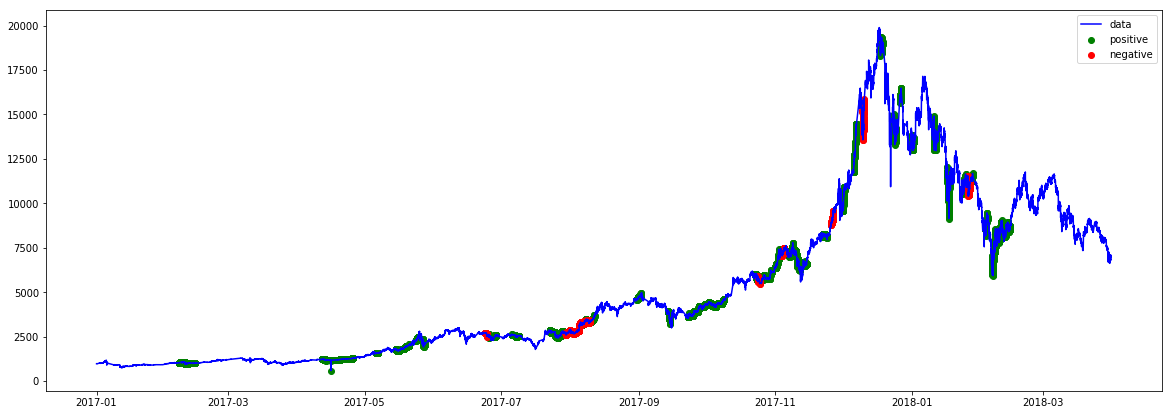

In [134]:
        plt.figure(figsize=(20,7))
        plt.plot(data_part.data, color='b')
        plt.scatter(x = data_part[data_part['pos_neg'] ==1].index,y = data_part[data_part['pos_neg'] ==1].data, color='g',linewidths=1, label ='positive')
        plt.scatter(x = data_part[data_part['pos_neg'] ==-1].index,y = data_part[data_part['pos_neg'] ==-1].data, color='r',linewidths=1, label = 'negative')
        plt.legend()
        plt.show()

----------------

# Overall Count

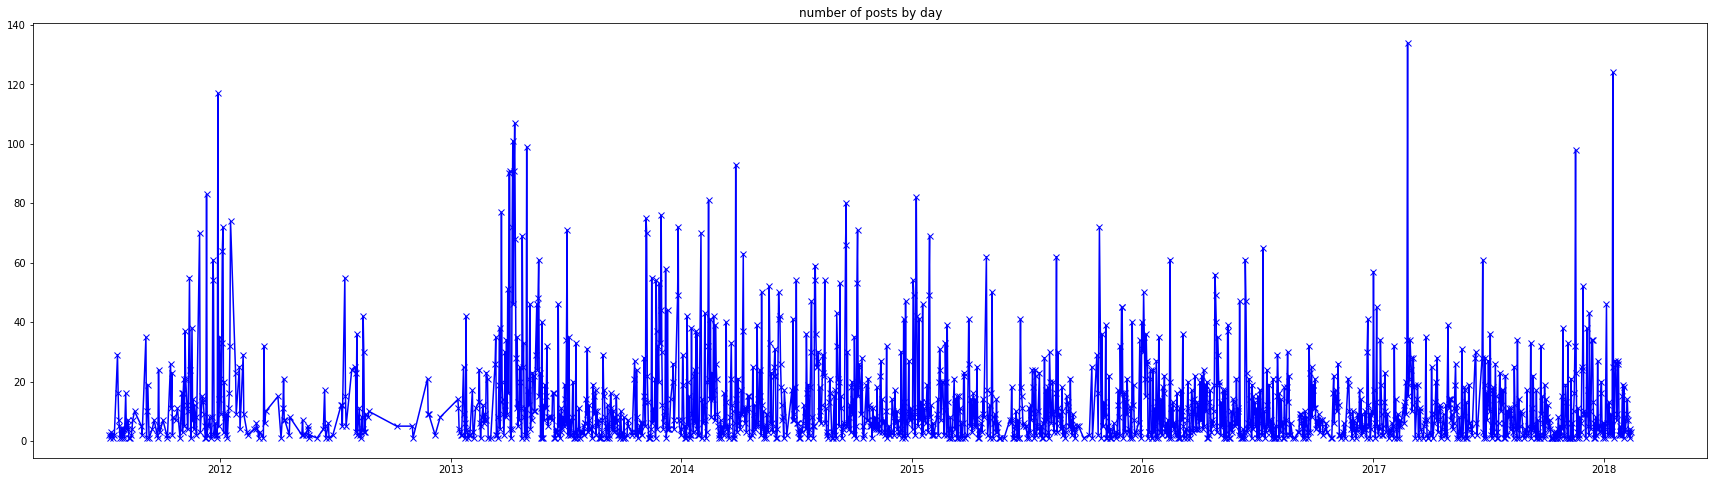

In [250]:
id_unique = np.unique(id_unique)
count = {}
for id_ in id_unique:
    for key, timestamp in topic_date_count_dict.keys():
        if (key == id_):
            count[timestamp] = topic_date_count_dict[(key, timestamp)]
            
od = collections.OrderedDict(sorted(count.items()))

plt.figure(figsize = (30,8))
plt.plot( od.keys(), od.values() ,'xb-')
plt.title('number of posts by day')
plt.show()

In [251]:
selct_count= {key:value for key, value in od.items() if key.date().year >= 2017}

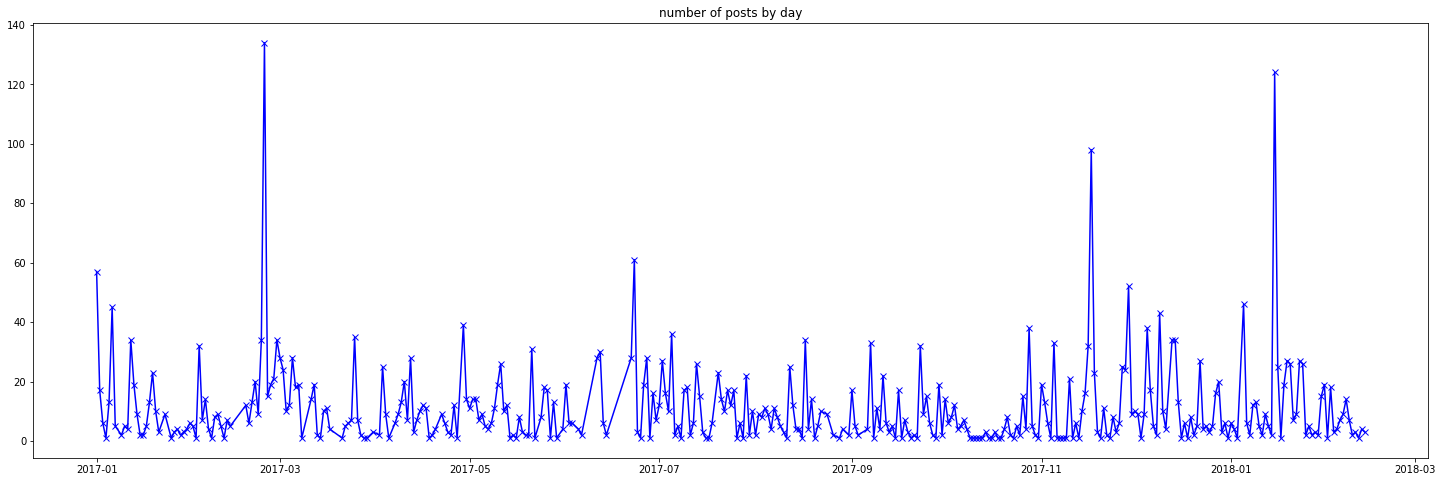

In [252]:
plt.figure(figsize = (25,8))
plt.plot( selct_count.keys(), selct_count.values() ,'xb-')
plt.title('number of posts by day')
plt.savefig('overall_count.jpg')
plt.show()

# count topic

In [240]:
doc_date_count_dict = {}

In [241]:
# group topic daily counts
for titleID, timestamp in date_topic_groups.keys():
    j = len(date_topic_groups[(titleID, timestamp)])
    
    doc_date_count_dict.update({(titleID, timestamp):{'posts':date_topic_groups[(titleID, timestamp)], 'count': j}})

In [242]:
for titleID, timestamp in doc_date_count_dict:
    topics = damodel.get_document_topics(bow_dict[titleID])
    max_prob = 0
    max_t = 0
    for t, prob in topics:
        if prob > max_prob:
            max_prob = prob
            max_t = t
    
       
    doc_date_count_dict.update({(titleID, timestamp):{'maxTopicID': max_t, 'count':doc_date_count_dict[(titleID, timestamp)]['count'], 'allTopicsWithProb': topics}})

In [243]:
topic_date_count_dict = {}

In [244]:
for docID, timestamp in doc_date_count_dict:
    max_topic = doc_date_count_dict[(docID, timestamp)]['maxTopicID']
    if (max_topic, timestamp) in topic_date_count_dict:
        topic_date_count_dict[(max_topic, timestamp)]+=doc_date_count_dict[(docID, timestamp)]['count']
    else:
        topic_date_count_dict[(max_topic, timestamp)] = doc_date_count_dict[(docID, timestamp)]['count']

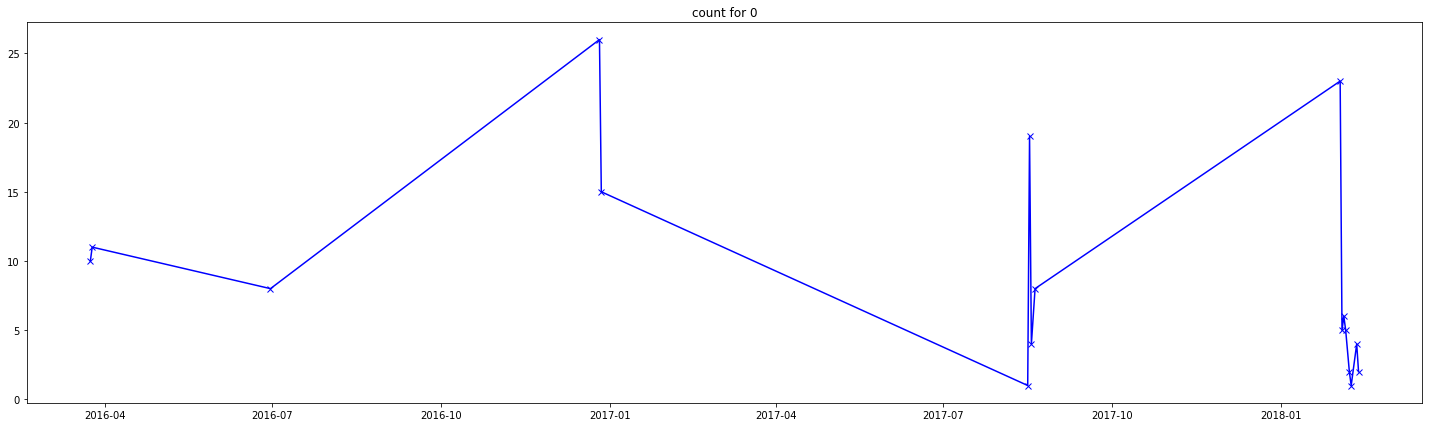

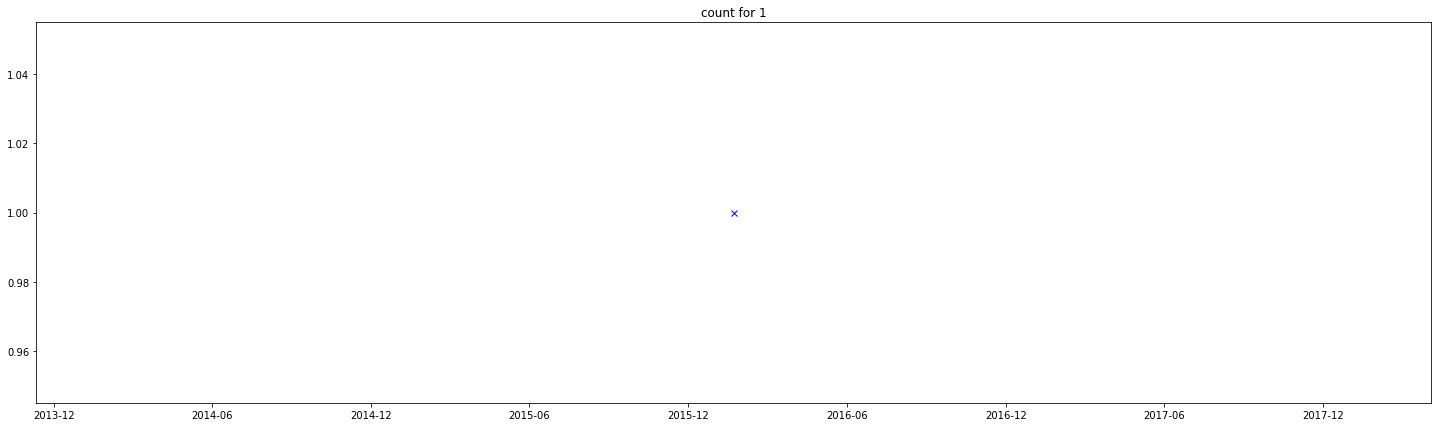

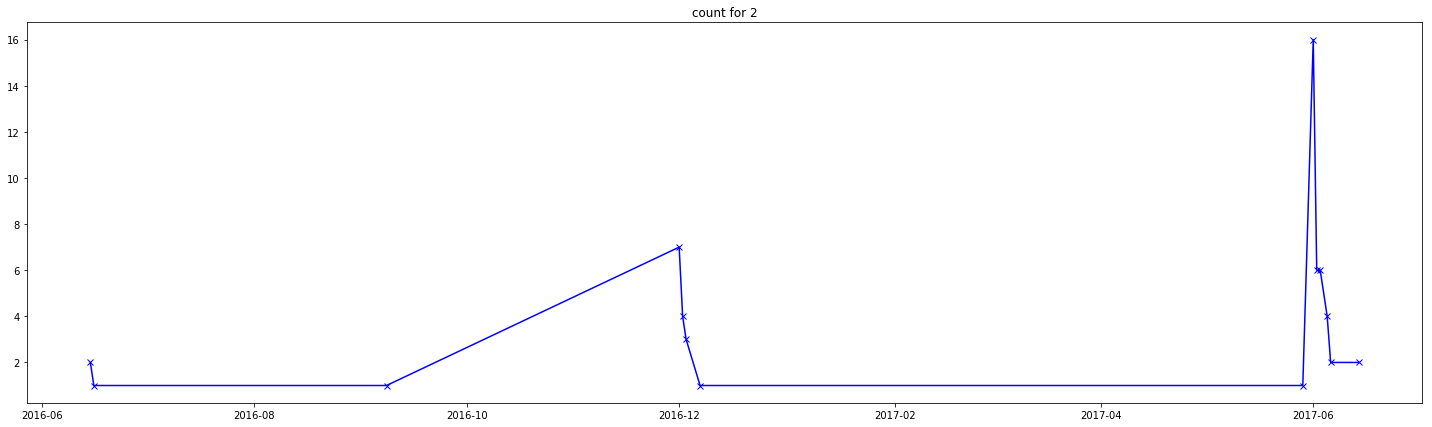

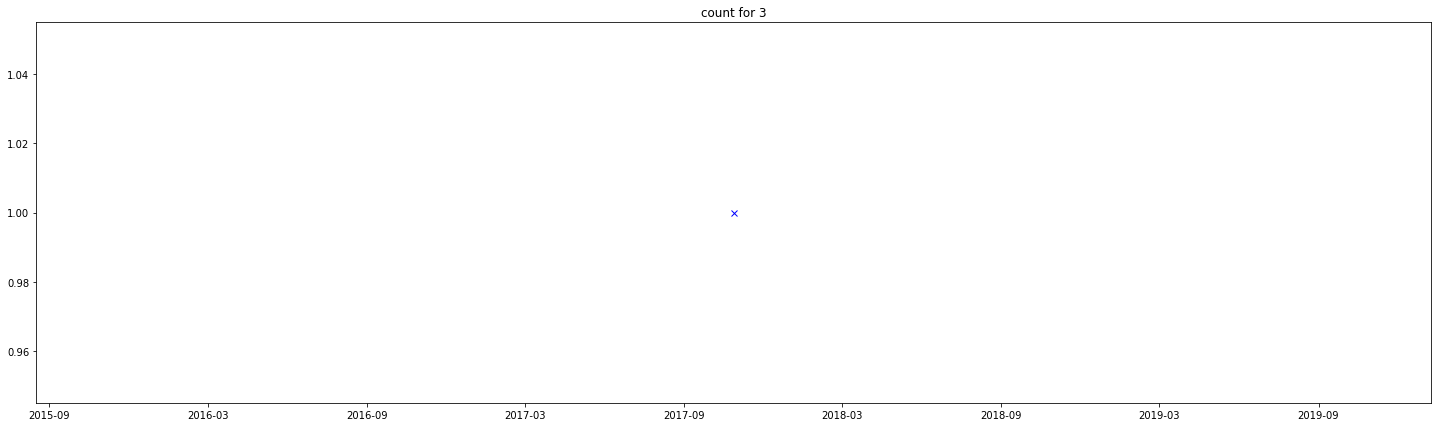

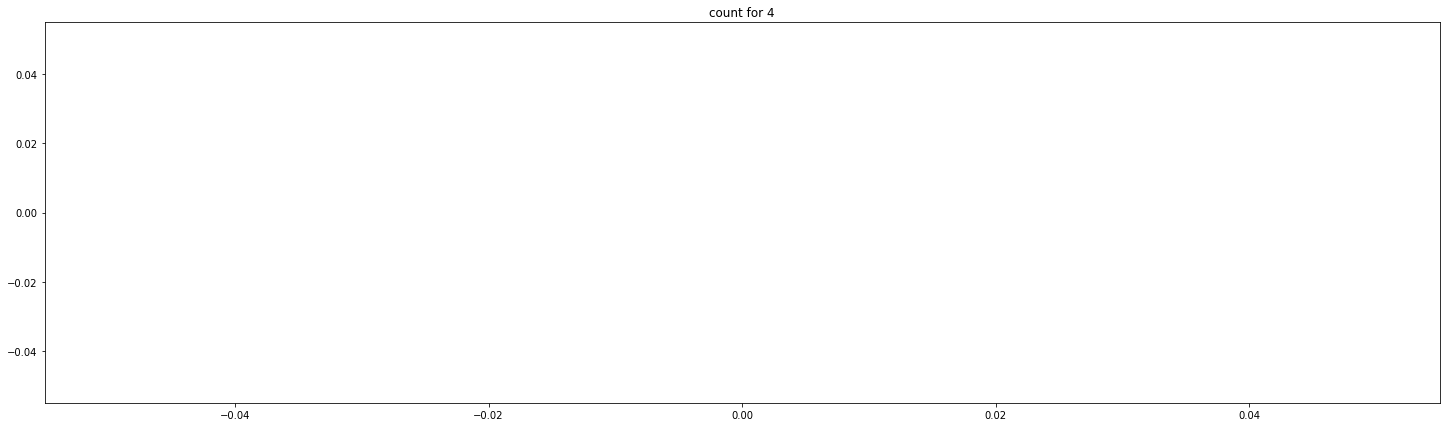

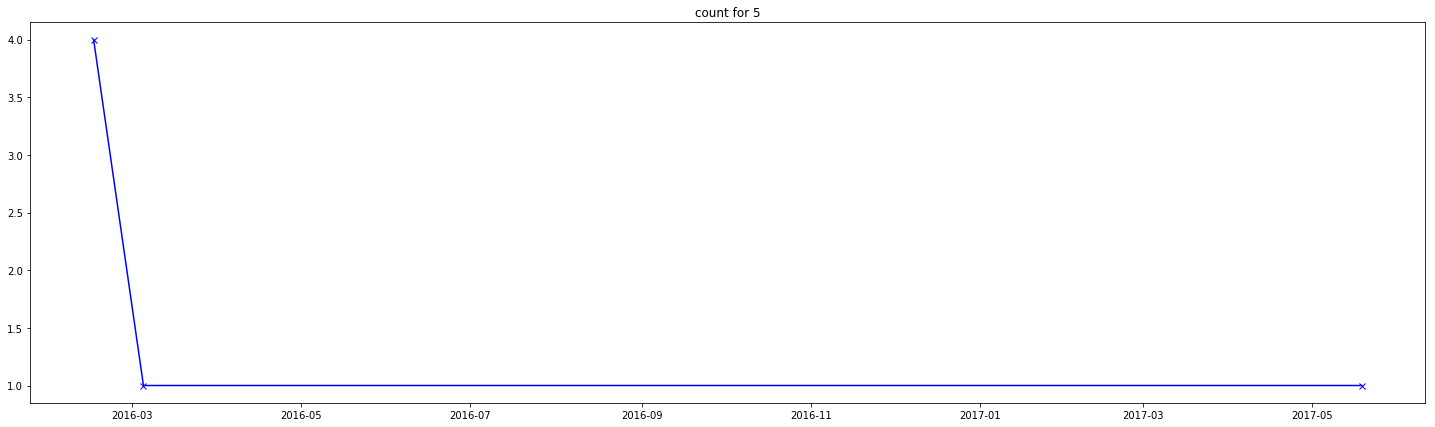

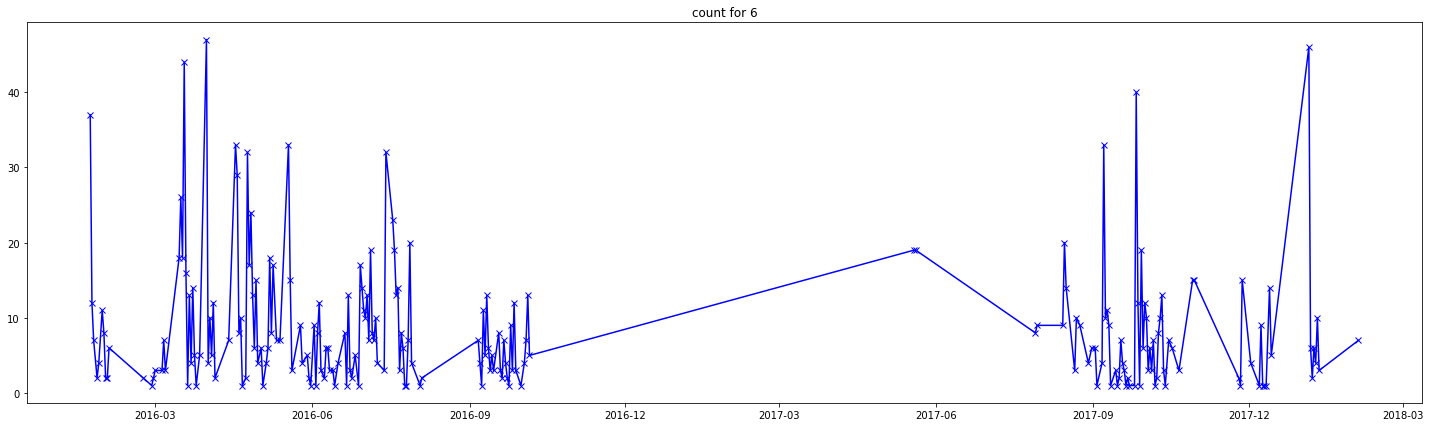

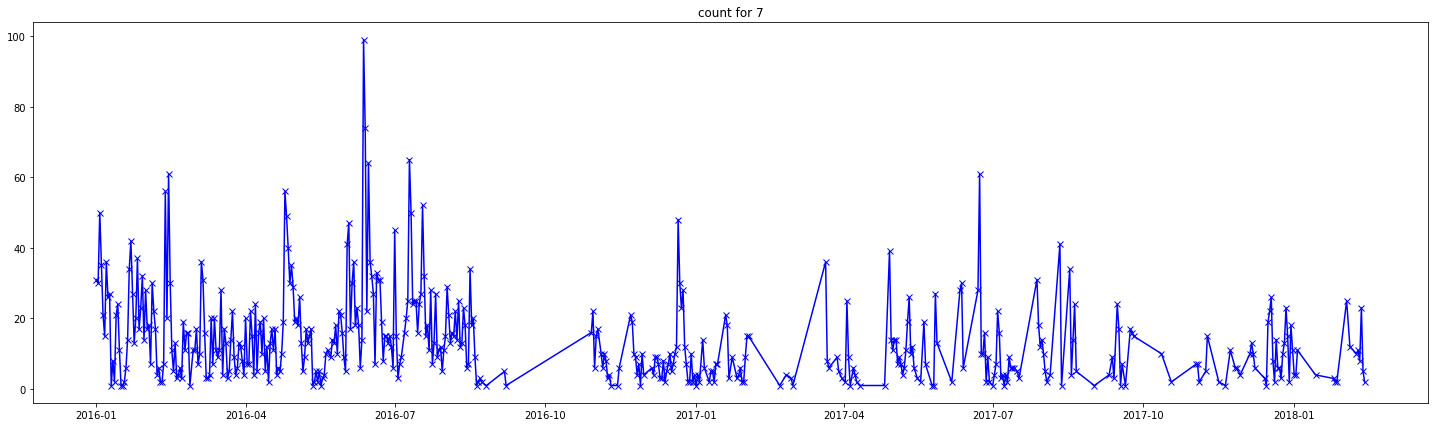

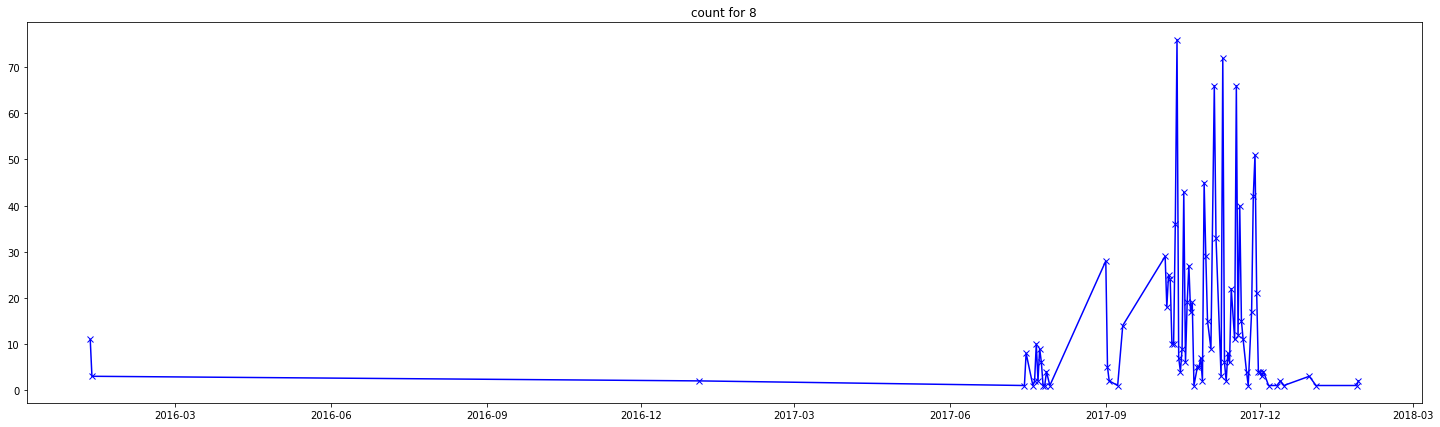

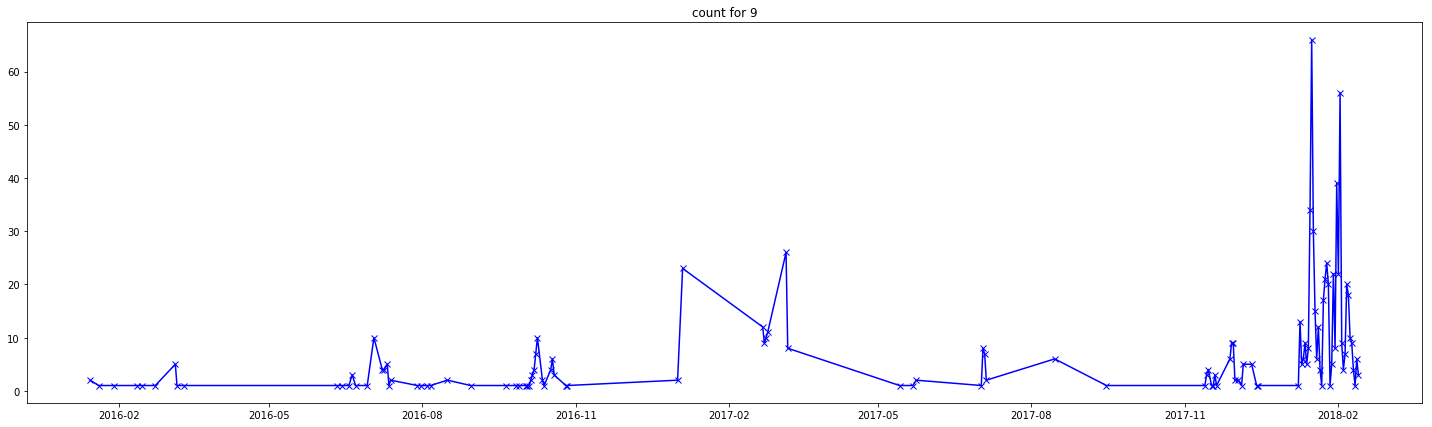

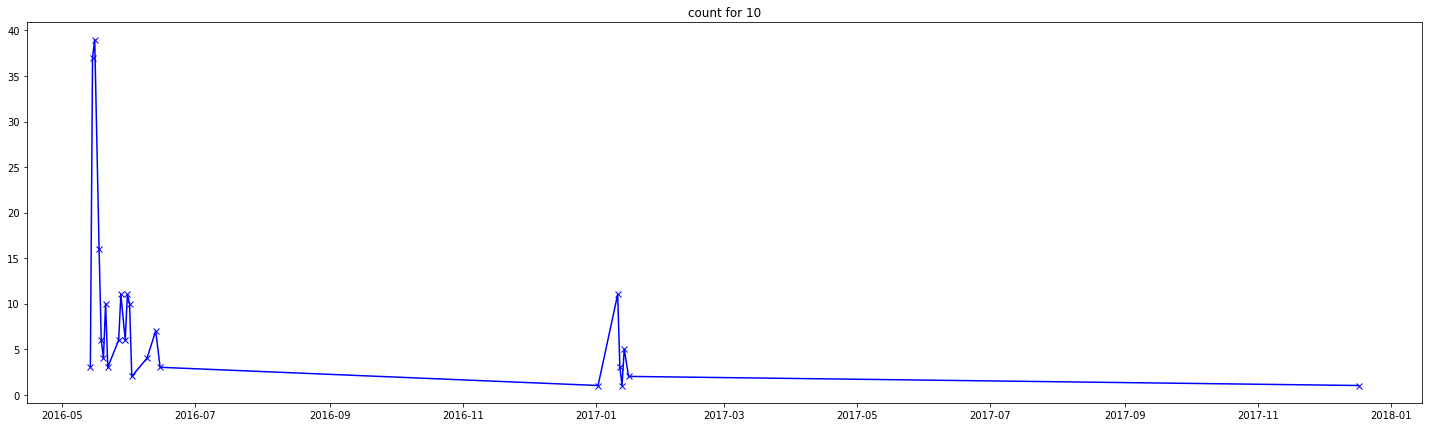

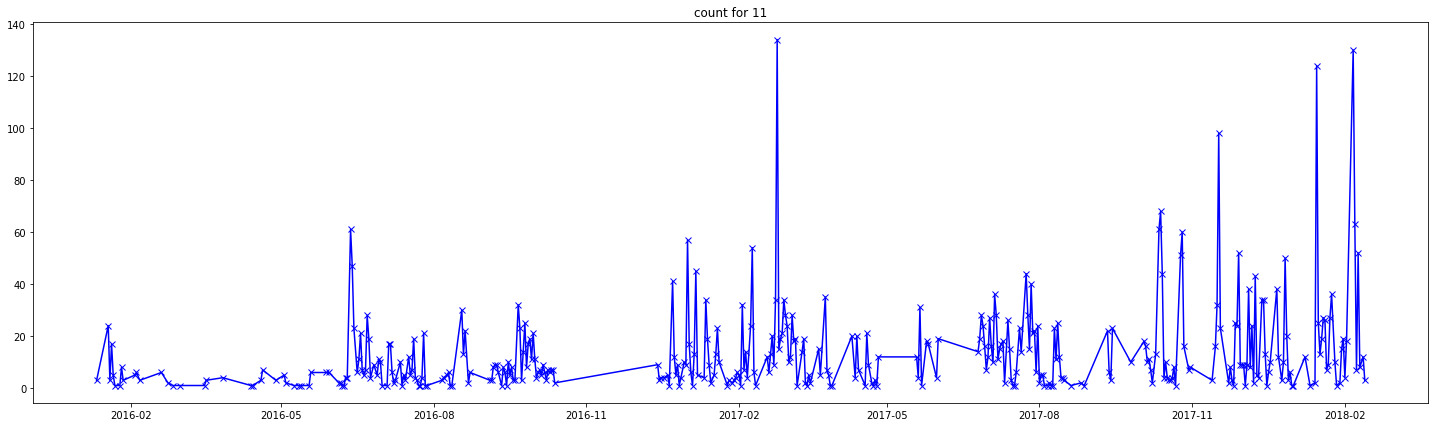

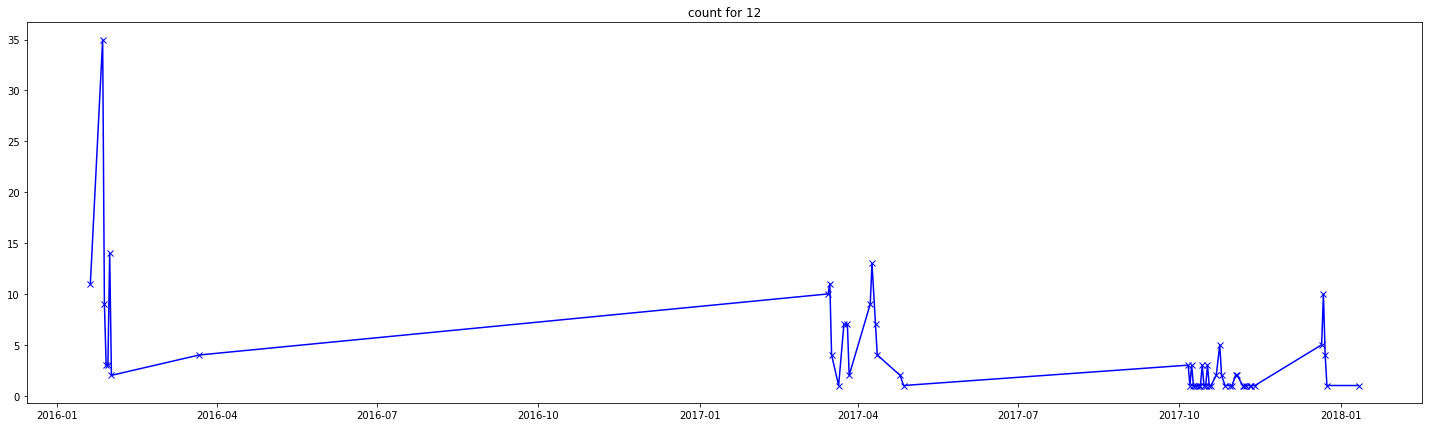

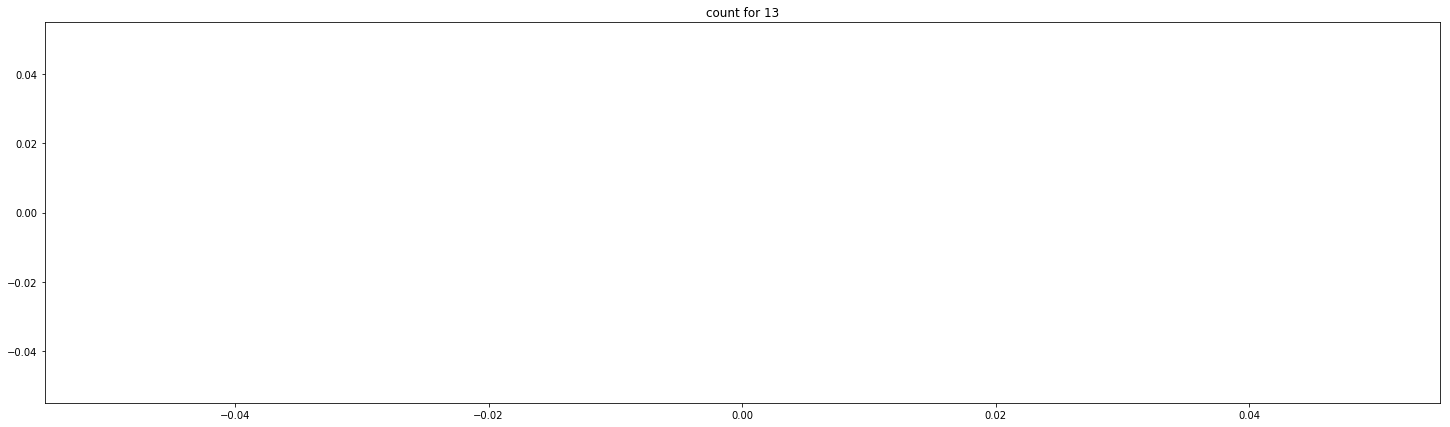

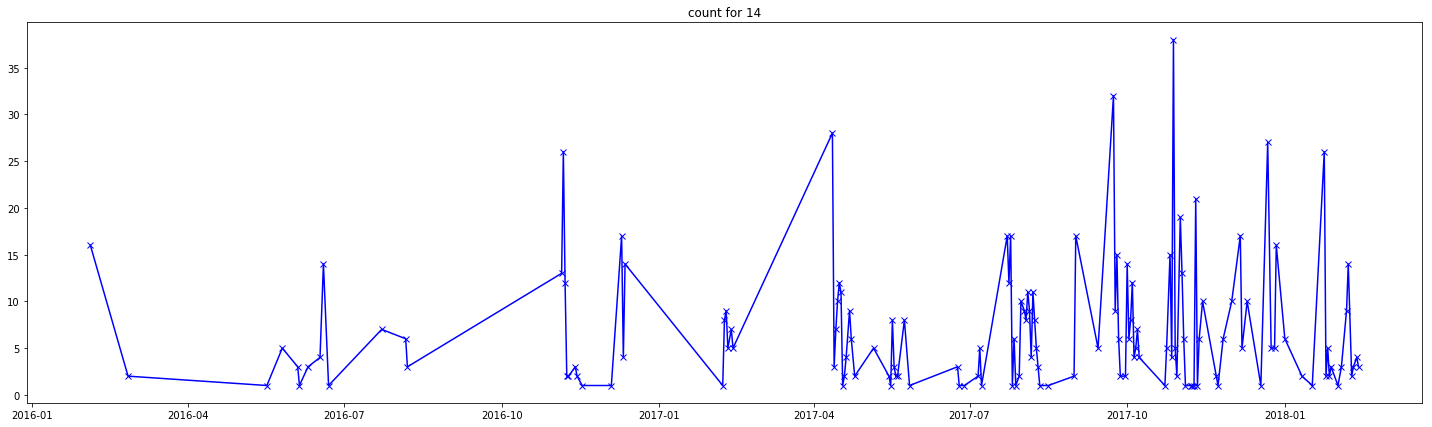

In [254]:
id_unique = np.unique(id_unique)
for id_ in id_unique:
    count = {}
    for key, timestamp in topic_date_count_dict.keys():
        if (key == id_):
            count[timestamp] = topic_date_count_dict[(key, timestamp)]
            
    od = collections.OrderedDict(sorted(count.items()))
    od= {key:value for key, value in od.items() if key.date().year >= 2016}
    
    plt.figure(figsize = (25,7))
    plt.plot( od.keys(), od.values() ,'xb-')
    plt.title('count for '+ str(id_))
    plt.show()
    

-----------------